In [210]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [211]:
df = pd.read_csv("C:\\Users\\JOKER\Desktop\\info.csv", sep =",")

In [212]:
df

,session_id,channel,device,visit_time,country
0,6721837803725769317162514800620210701,Organic Search,desktop,1625148006,Singapore
1,8225818815437268011162508906720210701,Affiliates,mobile,1625089067,Sweden
2,168639865277989852162511356620210701,(Other),mobile,-1625157567,Japan
3,2791392460970756629162513154120210701,Organic Search,mobile,1625131541,Germany
4,1108809215688723731162508775020210701,Affiliates,desktop,1625087750,United States
...,...,...,...,...,...
21995,985152923939636284162512271520210701,Affiliates,desktop,1625122715,United States
21996,6683035565935102986162509927420210701,Organic Search,mobile,1625099274,Taiwan
21997,1933895419916275678162511663820210701,Affiliates,mobile,1625116638,United States
21998,3620416024926349319162515559220210701,Affiliates,mobile,1625155592,Bolivia


In [213]:
# Data Characteristics
def data_characteristics(df):
    # shape of the dataset
    print("Shape of the Dataset : {}".format(df.shape))
    print("Number of Columns in the Dataset : {}".format(df.shape[1]))
    print("Number of Rows in the Dataset : {}".format(df.shape[0]))
    print("-"*40)
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = df.select_dtypes(include = [np.number])
    categoric_features = df.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("-"*40)
    
    # Unique values
    print("No of unique values : {}".format(df.nunique()))
    print("-"*40)
    
    # Number of NOT NUll Values
    print("No of NON-NANS : {}".format(df.count()))
    print("-"*40)
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(df.info(verbose = False, memory_usage = "deep")))
    print("-"*40)
    
#------------------------------------------------------------------------------#

# dataset Characteristics
print(data_characteristics(df))

# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
df.describe(include = "all", percentiles = [.15, .25, .50, .75, .85]).transpose()

Shape of the Dataset : (22000, 5)
Number of Columns in the Dataset : 5
Number of Rows in the Dataset : 22000
----------------------------------------
Number of Numerical Features : 1
Number of Categorical Features : 4
----------------------------------------
No of unique values : session_id    22000
channel           9
device            3
visit_time    18821
country         197
dtype: int64
----------------------------------------
No of NON-NANS : session_id    22000
channel       22000
device        22000
visit_time    22000
country       22000
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Columns: 5 entries, session_id to country
dtypes: int64(1), object(4)
memory usage: 6.3 MB
Information of the Dataset : None
----------------------------------------
None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,15%,25%,50%,75%,85%,max
session_id,22000,22000,460429094271935800162509491220210701,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel,22000,9,Affiliates,8788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device,22000,3,desktop,12314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_time,22000.0,NaN,NaN,NaN,1527622168.9105,554470266.086754,-1625157567.0,1625097975.55,1625105266.5,1625130752.5,1625152894.0,1625160527.75,1625173198.0
country,22000,197,United States,5782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Percentage of Null Vlues
def check_null(df):
    null_per = (df.isnull().sum() / len(df)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.xticks(rotation = "90")
        plt.title("Percentage of the null values in the dataset")
        plt.show()
                
    except:
        print("There is NO null values in the dataset")
        print("Returning the dataset....")
        return df
    
    return null_plot

#----------------------------------------------------------------------------#
                
check_null(df)

There is NO null values in the dataset
Returning the dataset....


,session_id,channel,device,visit_time,country
0,6721837803725769317162514800620210701,Organic Search,desktop,1625148006,Singapore
1,8225818815437268011162508906720210701,Affiliates,mobile,1625089067,Sweden
2,168639865277989852162511356620210701,(Other),mobile,-1625157567,Japan
3,2791392460970756629162513154120210701,Organic Search,mobile,1625131541,Germany
4,1108809215688723731162508775020210701,Affiliates,desktop,1625087750,United States
...,...,...,...,...,...
21995,985152923939636284162512271520210701,Affiliates,desktop,1625122715,United States
21996,6683035565935102986162509927420210701,Organic Search,mobile,1625099274,Taiwan
21997,1933895419916275678162511663820210701,Affiliates,mobile,1625116638,United States
21998,3620416024926349319162515559220210701,Affiliates,mobile,1625155592,Bolivia


<Figure size 1008x720 with 0 Axes>

In [215]:
from datetime import datetime
df['visit_time']=pd.to_datetime(df['visit_time'],unit='s')
df.head(50)

,session_id,channel,device,visit_time,country
0,6721837803725769317162514800620210701,Organic Search,desktop,2021-07-01 14:00:06,Singapore
1,8225818815437268011162508906720210701,Affiliates,mobile,2021-06-30 21:37:47,Sweden
2,168639865277989852162511356620210701,(Other),mobile,1918-07-03 07:20:33,Japan
3,2791392460970756629162513154120210701,Organic Search,mobile,2021-07-01 09:25:41,Germany
4,1108809215688723731162508775020210701,Affiliates,desktop,2021-06-30 21:15:50,United States
5,3632234623873655420162510501920210701,Direct,desktop,2021-07-01 02:03:39,United States
6,1147311720597646950162512472520210701,Organic Search,mobile,2021-07-01 07:32:05,United Kingdom
7,464795723106190836162513058820210701,Organic Search,desktop,2021-07-01 09:09:48,Italy
8,5777593727645655777162514884120210701,(Other),desktop,2021-07-01 14:14:01,South Korea
9,1724096592608078706162514008620210701,Direct,mobile,2021-07-01 11:48:06,Jamaica


In [216]:
df['visit_time'] = pd.to_datetime(df['visit_time'])
df['year'], df['month'] = df['visit_time'].apply(lambda x: x.year), df['visit_time'].apply(lambda x: x.month)
df

,session_id,channel,device,visit_time,country,year,month
0,6721837803725769317162514800620210701,Organic Search,desktop,2021-07-01 14:00:06,Singapore,2021,7
1,8225818815437268011162508906720210701,Affiliates,mobile,2021-06-30 21:37:47,Sweden,2021,6
2,168639865277989852162511356620210701,(Other),mobile,1918-07-03 07:20:33,Japan,1918,7
3,2791392460970756629162513154120210701,Organic Search,mobile,2021-07-01 09:25:41,Germany,2021,7
4,1108809215688723731162508775020210701,Affiliates,desktop,2021-06-30 21:15:50,United States,2021,6
...,...,...,...,...,...,...,...
21995,985152923939636284162512271520210701,Affiliates,desktop,2021-07-01 06:58:35,United States,2021,7
21996,6683035565935102986162509927420210701,Organic Search,mobile,2021-07-01 00:27:54,Taiwan,2021,7
21997,1933895419916275678162511663820210701,Affiliates,mobile,2021-07-01 05:17:18,United States,2021,7
21998,3620416024926349319162515559220210701,Affiliates,mobile,2021-07-01 16:06:32,Bolivia,2021,7


In [217]:
df.to_csv('df_year.csv')

In [218]:
df_filtered = df[df['visit_time'].dt.strftime('%Y') == '1918']
df_filtered

,session_id,channel,device,visit_time,country,year,month
2,168639865277989852162511356620210701,(Other),mobile,1918-07-03 07:20:33,Japan,1918,7
34,2362624746233856967162509417220210701,Affiliates,desktop,1918-07-03 07:20:33,Romania,1918,7
101,3493498878038875906162516161120210701,Organic Search,desktop,1918-07-03 07:20:33,India,1918,7
193,8339729302406681878162515076520210701,Organic Search,desktop,1918-07-03 07:20:33,Sweden,1918,7
270,4187859884187285201162516254220210701,Affiliates,desktop,1918-07-03 07:20:33,Lithuania,1918,7
...,...,...,...,...,...,...,...
21931,6127194268719973474162509731420210701,Referral,mobile,1918-07-03 07:20:33,Japan,1918,7
21943,2042853534715433311162511702020210701,Direct,desktop,1918-07-03 07:20:33,United States,1918,7
21945,5944583142741252654162516842920210701,Direct,desktop,1918-07-03 07:20:33,Germany,1918,7
21949,531332574771748955162510447520210701,Direct,mobile,1918-07-03 07:20:33,United States,1918,7


In [219]:
df.drop(df.loc[df['year']==1918].index, inplace=True)
df

,session_id,channel,device,visit_time,country,year,month
0,6721837803725769317162514800620210701,Organic Search,desktop,2021-07-01 14:00:06,Singapore,2021,7
1,8225818815437268011162508906720210701,Affiliates,mobile,2021-06-30 21:37:47,Sweden,2021,6
3,2791392460970756629162513154120210701,Organic Search,mobile,2021-07-01 09:25:41,Germany,2021,7
4,1108809215688723731162508775020210701,Affiliates,desktop,2021-06-30 21:15:50,United States,2021,6
5,3632234623873655420162510501920210701,Direct,desktop,2021-07-01 02:03:39,United States,2021,7
...,...,...,...,...,...,...,...
21995,985152923939636284162512271520210701,Affiliates,desktop,2021-07-01 06:58:35,United States,2021,7
21996,6683035565935102986162509927420210701,Organic Search,mobile,2021-07-01 00:27:54,Taiwan,2021,7
21997,1933895419916275678162511663820210701,Affiliates,mobile,2021-07-01 05:17:18,United States,2021,7
21998,3620416024926349319162515559220210701,Affiliates,mobile,2021-07-01 16:06:32,Bolivia,2021,7


In [220]:
df.to_csv('df_relevant_year.csv')

In [221]:
# Displaying different features of the dataset
def dataset_info(df):
    # displaying the keys of the dataset
    print("Total Features of the Dataset - ")
    print(df.keys())
    print("-"*100)
    
    # displaying the Numeric features
    print("Numerical Features of the Dataset - ")
    numeric = df.select_dtypes(include = [np.number])
    print(numeric.keys())
    print("-"*100)
    
    # displaying the categoric features
    print("Categorical Features of the Dataset - ")
    categoric = df.select_dtypes(exclude = [np.number])
    print(categoric.keys())
    print("-"*100)

# --------------------------------------------------------------------------------------------------------#
dataset_info(df)

Total Features of the Dataset - 
Index(['session_id', 'channel', 'device', 'visit_time', 'country', 'year',
       'month'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Numerical Features of the Dataset - 
Index(['year', 'month'], dtype='object')
----------------------------------------------------------------------------------------------------
Categorical Features of the Dataset - 
Index(['session_id', 'channel', 'device', 'visit_time', 'country'], dtype='object')
----------------------------------------------------------------------------------------------------


In [70]:
def dataset(df):
    # Dsiplaying the No. of missing values
    print("Number of missing Values in dataset : {}"
          .format(df["channel"].isnull().sum()))
    print("-"*50)
    

    
    # Imputing the missing values with NONE
    df["channel"] = df["channel"].fillna("None")
    
    # Printing the No. of missing values after Imputation
    print("Number of missing Values in dataset : {}"
          .format(df["channel"].isnull().sum()))
    print("-"*50)
    
    # Setting the copy of filtered FirePlace
    filtered_dataset = df["channel"].copy()
    
    # Confirming the Imputation
    print("Comfirming the Imputation - ")
    print(pd.crosstab(df["channel"], filtered_dataset))
    print("-"*50)
    

dataset(df)


df["channel"] = df["channel"].fillna("None")

Number of missing Values in dataset : 0
--------------------------------------------------
Number of missing Values in dataset : 0
--------------------------------------------------
Comfirming the Imputation - 
channel         (Other)  Affiliates  Direct  Display  Email  Organic Search  \
channel                                                                       
(Other)            1033           0       0        0      0               0   
Affiliates            0        8521       0        0      0               0   
Direct                0           0    3196        0      0               0   
Display               0           0       0        5      0               0   
Email                 0           0       0        0    199               0   
Organic Search        0           0       0        0      0            6406   
Paid Search           0           0       0        0      0               0   
Referral              0           0       0        0      0               0   

In [222]:
df1 = pd.read_csv("C:\\Users\\JOKER\Desktop\\revenue.csv", sep =",")

In [223]:
df1

,session_id,transactions,revenue
0,2724239719584869901162514092220210701,1,74.990555
1,8444122631467082144162508713220210701,1,-83.416461
2,3842831009428888825162511999520210701,1,125.343765
3,14116763805965351669162512395120210701,1,83.416461
4,1461403808530423424162511943820210701,1,74.990555
...,...,...,...
1995,2501361733312791493162511354020210701,1,75.611232
1996,8153810540973544136162516715820210701,1,-74.990555
1997,17926190600621475365162512511820210701,1,74.990555
1998,2523989631072872853162517237320210701,1,125.343765


In [224]:
# Data Characteristics
def data_characteristics(df1):
    # shape of the dataset
    print("Shape of the Dataset : {}".format(df1.shape))
    print("Number of Columns in the Dataset : {}".format(df1.shape[1]))
    print("Number of Rows in the Dataset : {}".format(df1.shape[0]))
    print("-"*40)
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = df1.select_dtypes(include = [np.number])
    categoric_features = df1.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("-"*40)
    
    # Unique values
    print("No of unique values : {}".format(df1.nunique()))
    print("-"*40)
    
    # Number of NOT NUll Values
    print("No of NON-NANS : {}".format(df1.count()))
    print("-"*40)
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(df1.info(verbose = False, memory_usage = "deep")))
    print("-"*40)
    
#------------------------------------------------------------------------------#

# dataset Characteristics
print(data_characteristics(df1))

# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
df1.describe(include = "all", percentiles = [.15, .25, .50, .75, .85]).transpose()

Shape of the Dataset : (2000, 3)
Number of Columns in the Dataset : 3
Number of Rows in the Dataset : 2000
----------------------------------------
Number of Numerical Features : 2
Number of Categorical Features : 1
----------------------------------------
No of unique values : session_id      2000
transactions       3
revenue          154
dtype: int64
----------------------------------------
No of NON-NANS : session_id      2000
transactions    2000
revenue         2000
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 3 entries, session_id to revenue
dtypes: float64(1), int64(1), object(1)
memory usage: 215.0 KB
Information of the Dataset : None
----------------------------------------
None
Statistical Summary of the Dataset : 


,count,unique,top,freq,mean,std,min,15%,25%,50%,75%,85%,max
session_id,2000,2000,4388208636734276303162509696420210701,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transactions,2000.0,NaN,NaN,NaN,1.013,0.117635,1.0,1.0,1.0,1.0,1.0,1.0,3.0
revenue,2000.0,NaN,NaN,NaN,26369.077339,159966.361993,-834164.61,74.990555,75.611232,83.189665,100.088648,125.343765,2003343.2


In [225]:
# Percentage of Null Vlues
def check_null(df1):
    null_per = (df1.isnull().sum() / len(df1)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.xticks(rotation = "90")
        plt.title("Percentage of the null values in the dataset")
        plt.show()
                
    except:
        print("There is NO null values in the dataset")
        print("Returning the dataset....")
        return df1
    
    return null_plot

#----------------------------------------------------------------------------#
                
check_null(df1)

There is NO null values in the dataset
Returning the dataset....


,session_id,transactions,revenue
0,2724239719584869901162514092220210701,1,74.990555
1,8444122631467082144162508713220210701,1,-83.416461
2,3842831009428888825162511999520210701,1,125.343765
3,14116763805965351669162512395120210701,1,83.416461
4,1461403808530423424162511943820210701,1,74.990555
...,...,...,...
1995,2501361733312791493162511354020210701,1,75.611232
1996,8153810540973544136162516715820210701,1,-74.990555
1997,17926190600621475365162512511820210701,1,74.990555
1998,2523989631072872853162517237320210701,1,125.343765


<Figure size 1008x720 with 0 Axes>

In [226]:
inner_merged_total = pd.merge(df, df1, on=["session_id", "session_id"])

In [228]:
inner_merged_total.head(50)

,session_id,channel,device,visit_time,country,year,month,transactions,revenue
0,2724239719584869901162514092220210701,Organic Search,desktop,2021-07-01 12:02:02,Norway,2021,7,1,74.990555
1,8444122631467082144162508713220210701,Affiliates,desktop,2021-06-30 21:05:32,United States,2021,6,1,-83.416461
2,3842831009428888825162511999520210701,Paid Search,desktop,2021-07-01 06:13:15,Taiwan,2021,7,1,125.343765
3,14116763805965351669162512395120210701,(Other),desktop,2021-07-01 07:19:11,United States,2021,7,1,83.416461
4,1461403808530423424162511943820210701,Affiliates,desktop,2021-07-01 06:03:58,Malaysia,2021,7,1,74.990555
5,8240479952869159090162511073720210701,Affiliates,desktop,2021-07-01 03:38:57,United States,2021,7,1,-128.267120
6,4065157199777609145162514271020210701,Affiliates,mobile,2021-07-01 12:31:50,United Kingdom,2021,7,1,76.741211
7,14385340808910276997162511133420210701,Organic Search,desktop,2021-07-01 03:48:54,United States,2021,7,1,125.343765
8,5070421171258279481162515768020210701,Organic Search,desktop,2021-07-01 16:41:20,United States,2021,7,1,125.343765
9,8607222176293898162162508805820210701,Affiliates,mobile,2021-06-30 21:20:58,United States,2021,6,1,125.002976


In [229]:
# Data Characteristics
def data_characteristics(inner_merged_total):
    # shape of the dataset
    print("Shape of the Dataset : {}".format(inner_merged_total.shape))
    print("Number of Columns in the Dataset : {}".format(inner_merged_total.shape[1]))
    print("Number of Rows in the Dataset : {}".format(inner_merged_total.shape[0]))
    print("-"*40)
    
    # Understanding the Number of Numeric and Categorical features in dataset
    numeric_features = inner_merged_total.select_dtypes(include = [np.number])
    categoric_features = inner_merged_total.select_dtypes(exclude = [np.number])
    print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("-"*40)
    
    # Unique values
    print("No of unique values : {}".format(inner_merged_total.nunique()))
    print("-"*40)
    
    # Number of NOT NUll Values
    print("No of NON-NANS : {}".format(inner_merged_total.count()))
    print("-"*40)
    
    # Understanding the dataset
    print("Information of the Dataset : {}".format(inner_merged_total.info(verbose = False, memory_usage = "deep")))
    print("-"*40)
    
#------------------------------------------------------------------------------#

# dataset Characteristics
print(data_characteristics(inner_merged_total))

# Statistical Summary of the dataset
print("Statistical Summary of the Dataset : ")
inner_merged_total.describe(include = "all", percentiles = [.15, .25, .50, .75, .85]).transpose()

Shape of the Dataset : (1931, 9)
Number of Columns in the Dataset : 9
Number of Rows in the Dataset : 1931
----------------------------------------
Number of Numerical Features : 4
Number of Categorical Features : 5
----------------------------------------
No of unique values : session_id      1931
channel            8
device             3
visit_time      1912
country           77
year               1
month              2
transactions       3
revenue          152
dtype: int64
----------------------------------------
No of NON-NANS : session_id      1931
channel         1931
device          1931
visit_time      1931
country         1931
year            1931
month           1931
transactions    1931
revenue         1931
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1931 entries, 0 to 1930
Columns: 9 entries, session_id to revenue
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 642.0 KB
Information of the D

,count,unique,top,freq,first,last,mean,std,min,15%,25%,50%,75%,85%,max
session_id,1931,1931,4388208636734276303162509696420210701,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel,1931,8,Affiliates,648,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device,1931,3,desktop,1590,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_time,1931,1912,2021-07-01 09:17:42,2,2021-06-30 21:00:02,2021-07-01 20:57:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1931,77,United States,960,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1931.0,NaN,NaN,NaN,NaT,NaT,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0,2021.0,2021.0
month,1931.0,NaN,NaN,NaN,NaT,NaT,6.880891,0.324001,6.0,7.0,7.0,7.0,7.0,7.0,7.0
transactions,1931.0,NaN,NaN,NaN,NaT,NaT,1.012429,0.115399,1.0,1.0,1.0,1.0,1.0,1.0,3.0
revenue,1931.0,NaN,NaN,NaN,NaT,NaT,26466.330924,160742.84312,-834164.61,74.990555,75.611232,83.189665,104.978689,125.343765,2003343.2


In [39]:
# Percentage of Null Vlues
def check_null(inner_merged_total):
    null_per = (inner_merged_total.isnull().sum() / len(df1)) * 100
    
    try:
        # droping columns having null percentage to 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        # plotting the bar plot of NULL %
        plt.figure(figsize = (14,10))
        null_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.xticks(rotation = "90")
        plt.title("Percentage of the null values in the dataset")
        plt.show()
                
    except:
        print("There is NO null values in the dataset")
        print("Returning the dataset....")
        return inner_merged_total
    
    return null_plot

#----------------------------------------------------------------------------#
                
check_null(inner_merged_total)

There is NO null values in the dataset
Returning the dataset....


,session_id,channel,device,visit_time,country,transactions,revenue
0,2724239719584869901162514092220210701,Organic Search,desktop,1625140922,Norway,1,74.990555
1,8444122631467082144162508713220210701,Affiliates,desktop,1625087132,United States,1,-83.416461
2,3842831009428888825162511999520210701,Paid Search,desktop,1625119995,Taiwan,1,125.343765
3,14116763805965351669162512395120210701,(Other),desktop,1625123951,United States,1,83.416461
4,1461403808530423424162511943820210701,Affiliates,desktop,1625119438,Malaysia,1,74.990555
...,...,...,...,...,...,...,...
1995,2501361733312791493162511354020210701,Organic Search,desktop,1625113540,Canada,1,75.611232
1996,8153810540973544136162516715820210701,Organic Search,desktop,1625167158,United States,1,-74.990555
1997,17926190600621475365162512511820210701,Affiliates,desktop,1625125118,United States,1,74.990555
1998,2523989631072872853162517237320210701,Organic Search,mobile,1625172373,United States,1,125.343765


<Figure size 1008x720 with 0 Axes>

In [230]:
inner_merged_total.isnull().sum()

session_id      0
channel         0
device          0
visit_time      0
country         0
year            0
month           0
transactions    0
revenue         0
dtype: int64

In [231]:
inner_merged_total[inner_merged_total.notnull()]

,session_id,channel,device,visit_time,country,year,month,transactions,revenue
0,2724239719584869901162514092220210701,Organic Search,desktop,2021-07-01 12:02:02,Norway,2021,7,1,74.990555
1,8444122631467082144162508713220210701,Affiliates,desktop,2021-06-30 21:05:32,United States,2021,6,1,-83.416461
2,3842831009428888825162511999520210701,Paid Search,desktop,2021-07-01 06:13:15,Taiwan,2021,7,1,125.343765
3,14116763805965351669162512395120210701,(Other),desktop,2021-07-01 07:19:11,United States,2021,7,1,83.416461
4,1461403808530423424162511943820210701,Affiliates,desktop,2021-07-01 06:03:58,Malaysia,2021,7,1,74.990555
...,...,...,...,...,...,...,...,...,...
1926,2501361733312791493162511354020210701,Organic Search,desktop,2021-07-01 04:25:40,Canada,2021,7,1,75.611232
1927,8153810540973544136162516715820210701,Organic Search,desktop,2021-07-01 19:19:18,United States,2021,7,1,-74.990555
1928,17926190600621475365162512511820210701,Affiliates,desktop,2021-07-01 07:38:38,United States,2021,7,1,74.990555
1929,2523989631072872853162517237320210701,Organic Search,mobile,2021-07-01 20:46:13,United States,2021,7,1,125.343765


In [232]:
inner_merged_total.to_csv('inner_merged_total.csv')

In [233]:
inner_merged_total['channel'].unique()

array(['Organic Search', 'Affiliates', 'Paid Search', '(Other)', 'Direct',
       'Email', 'Referral', 'Social'], dtype=object)

In [235]:
final_df1 = inner_merged_total.sort_values(by=['channel'], ascending=False)
final_df1.head(50)

,session_id,channel,device,visit_time,country,year,month,transactions,revenue
536,9882284469210023955162516516620210701,Social,desktop,2021-07-01 18:46:06,United States,2021,7,1,75.611232
1300,737915691346006959162513399920210701,Social,mobile,2021-07-01 10:06:39,United States,2021,7,1,74.990555
1105,15376020975830633184162517176220210701,Social,desktop,2021-07-01 20:36:02,United States,2021,7,1,76.741211
121,6631254568336154225162508760120210701,Social,desktop,2021-06-30 21:13:21,United Kingdom,2021,6,1,76.620424
991,3315715819289041017162515160920210701,Social,mobile,2021-07-01 15:00:09,United Kingdom,2021,7,1,76.741211
159,17133168286338813247162510832920210701,Referral,desktop,2021-07-01 02:58:49,United States,2021,7,1,74.990555
1337,10085520279515742527162508860920210701,Referral,desktop,2021-06-30 21:30:09,United States,2021,6,1,80.458692
212,1220686456551186096162511088420210701,Referral,desktop,2021-07-01 03:41:24,Vietnam,2021,7,1,83.416461
1538,7387518736302738157162516543420210701,Referral,desktop,2021-07-01 18:50:34,Israel,2021,7,1,74.990555
988,7174419849392790551162513079020210701,Referral,desktop,2021-07-01 09:13:10,New Zealand,2021,7,1,74.990555


Channels

In [238]:
df_agg = inner_merged_total.groupby(['channel','device']).agg({'transactions':sum}, ascending=False)
df_agg

transactions
channel        device               
(Other)        desktop           176
               mobile              2
Affiliates     desktop           477
               mobile            160
               tablet             18
Direct         desktop           371
               mobile             38
               tablet              2
Email          desktop            22
               mobile              4
Organic Search desktop           316
               mobile             41
               tablet              5
Paid Search    desktop           202
               mobile             65
               tablet              7
Referral       desktop            44
Social         desktop             3
               mobile              2

In [365]:
df_agg = inner_merged_total.groupby(['channel','country']).agg({'transactions':sum}, ascending=False) 
df_agg

transactions
channel  country                     
(Other)  Armenia            83.416461
         Australia         572.426382
         Barbados           83.416461
         Belgium           173.126541
         Canada            159.027693
...                               ...
Referral United Kingdom     85.363819
         United States    2243.120033
         Vietnam            83.416461
Social   United Kingdom    153.361635
         United States     227.342998

[206 rows x 1 columns]

In [248]:
inner_merged_total[['channel','country','transactions']].groupby('country').agg(['mean','count'])

transactions      
                             mean count
country                                
Argentina                1.000000     2
Armenia                  1.000000     1
Australia                1.019231    52
Austria                  1.000000     6
Bahamas                  1.000000     1
...                           ...   ...
United Arab Emirates     1.000000     4
United Kingdom           1.013699   219
United States            1.008333   960
Venezuela                1.000000     1
Vietnam                  1.000000     1

[76 rows x 2 columns]

In [242]:
inner_merged_total.drop(inner_merged_total.loc[inner_merged_total['country']=='(not set)'].index, inplace=True)
inner_merged_total

,session_id,channel,device,visit_time,country,year,month,transactions,revenue
0,2724239719584869901162514092220210701,Organic Search,desktop,2021-07-01 12:02:02,Norway,2021,7,1,74.990555
1,8444122631467082144162508713220210701,Affiliates,desktop,2021-06-30 21:05:32,United States,2021,6,1,-83.416461
2,3842831009428888825162511999520210701,Paid Search,desktop,2021-07-01 06:13:15,Taiwan,2021,7,1,125.343765
3,14116763805965351669162512395120210701,(Other),desktop,2021-07-01 07:19:11,United States,2021,7,1,83.416461
4,1461403808530423424162511943820210701,Affiliates,desktop,2021-07-01 06:03:58,Malaysia,2021,7,1,74.990555
...,...,...,...,...,...,...,...,...,...
1926,2501361733312791493162511354020210701,Organic Search,desktop,2021-07-01 04:25:40,Canada,2021,7,1,75.611232
1927,8153810540973544136162516715820210701,Organic Search,desktop,2021-07-01 19:19:18,United States,2021,7,1,-74.990555
1928,17926190600621475365162512511820210701,Affiliates,desktop,2021-07-01 07:38:38,United States,2021,7,1,74.990555
1929,2523989631072872853162517237320210701,Organic Search,mobile,2021-07-01 20:46:13,United States,2021,7,1,125.343765


In [324]:
percent_missing = inner_merged_total.isnull().sum() * 100 / len(inner_merged_total)  #{ (total nulls in particular column*100)/total no.of rows }
missing_value_df = pd.DataFrame({'column_name': inner_merged_total.columns,
                                 'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
session_id,session_id,0.0
channel,channel,0.0
device,device,0.0
visit_time,visit_time,0.0
country,country,0.0
year,year,0.0
month,month,0.0
transactions,transactions,0.0
revenue,revenue,0.0
weekday,weekday,0.0


In [243]:
inner_merged_total['device'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [244]:
inner_merged_total['country'].unique()

array(['Norway', 'United States', 'Taiwan', 'Malaysia', 'United Kingdom',
       'China', 'France', 'Canada', 'Switzerland', 'Bahamas', 'Germany',
       'Australia', 'Austria', 'Singapore', 'Montenegro', 'Turkey',
       'India', 'Guatemala', 'Philippines', 'Israel', 'Russia',
       'Guadeloupe', 'Ghana', 'Sweden', 'Greece', 'Kuwait', 'Belgium',
       'Italy', 'Mexico', 'Japan', 'South Africa', 'Pakistan', 'Poland',
       'Vietnam', 'Portugal', 'Hong Kong', 'Finland', 'Colombia',
       'Congo - Brazzaville', 'Brazil', 'Netherlands', 'Namibia',
       'Czechia', 'Guam', 'New Zealand', 'Cyprus', 'Indonesia', 'Croatia',
       'South Korea', 'Thailand', 'Slovakia', 'Jordan', 'Barbados',
       'United Arab Emirates', 'Romania', 'Spain', 'Panama', 'Denmark',
       'Ukraine', 'Ethiopia', 'Kenya', 'Gibraltar', 'Nigeria', 'Jamaica',
       'Ecuador', 'Argentina', 'Moldova', 'Morocco', 'Armenia', 'Lebanon',
       'Ireland', 'Bangladesh', 'Venezuela', 'Cayman Islands',
       'South Suda

Best 3 countries.

In [363]:
final_df = inner_merged_total.sort_values(by=['revenue'], ascending=False)
final_df

,session_id,channel,device,visit_time,country,year,month,transactions,revenue,weekday,hour
1375,3072532267023267456162508729020210701,(Other),desktop,2021-06-30 21:08:10,United States,2021,6,2.003343e+06,2.003343e+06,2,21
369,8925579209701401863162510567320210701,Paid Search,desktop,2021-07-01 02:14:33,Canada,2021,7,1.337697e+06,1.337697e+06,3,2
1251,12465506584044730426162512620720210701,Affiliates,desktop,2021-07-01 07:56:47,United States,2021,7,1.263812e+06,1.263812e+06,3,7
920,282422048689355454162516038220210701,Organic Search,desktop,2021-07-01 17:26:22,United States,2021,7,1.253438e+06,1.253438e+06,3,17
1731,7879889344168583414162511804020210701,Organic Search,desktop,2021-07-01 05:40:40,United States,2021,7,1.253438e+06,1.253438e+06,3,5
...,...,...,...,...,...,...,...,...,...,...,...
5,8240479952869159090162511073720210701,Affiliates,desktop,2021-07-01 03:38:57,United States,2021,7,-1.282671e+02,-1.282671e+02,3,3
1912,2518193762954715107162510800420210701,(Other),desktop,2021-07-01 02:53:24,United States,2021,7,-1.348768e+02,-1.348768e+02,3,2
1616,2732631256752486454162510379220210701,Paid Search,mobile,2021-07-01 01:43:12,Canada,2021,7,-1.554748e+02,-1.554748e+02,3,1
252,3194693162830233858162512921820210701,Paid Search,desktop,2021-07-01 08:46:58,United States,2021,7,-1.567616e+02,-1.567616e+02,3,8


In [364]:
final_df = inner_merged_total.sort_values(by=['transactions'], ascending=False)
final_df

,session_id,channel,device,visit_time,country,year,month,transactions,revenue,weekday,hour
1375,3072532267023267456162508729020210701,(Other),desktop,2021-06-30 21:08:10,United States,2021,6,2.003343e+06,2.003343e+06,2,21
369,8925579209701401863162510567320210701,Paid Search,desktop,2021-07-01 02:14:33,Canada,2021,7,1.337697e+06,1.337697e+06,3,2
1251,12465506584044730426162512620720210701,Affiliates,desktop,2021-07-01 07:56:47,United States,2021,7,1.263812e+06,1.263812e+06,3,7
920,282422048689355454162516038220210701,Organic Search,desktop,2021-07-01 17:26:22,United States,2021,7,1.253438e+06,1.253438e+06,3,17
1731,7879889344168583414162511804020210701,Organic Search,desktop,2021-07-01 05:40:40,United States,2021,7,1.253438e+06,1.253438e+06,3,5
...,...,...,...,...,...,...,...,...,...,...,...
5,8240479952869159090162511073720210701,Affiliates,desktop,2021-07-01 03:38:57,United States,2021,7,-1.282671e+02,-1.282671e+02,3,3
1912,2518193762954715107162510800420210701,(Other),desktop,2021-07-01 02:53:24,United States,2021,7,-1.348768e+02,-1.348768e+02,3,2
1616,2732631256752486454162510379220210701,Paid Search,mobile,2021-07-01 01:43:12,Canada,2021,7,-1.554748e+02,-1.554748e+02,3,1
252,3194693162830233858162512921820210701,Paid Search,desktop,2021-07-01 08:46:58,United States,2021,7,-1.567616e+02,-1.567616e+02,3,8


In [381]:
print('Unique session id: ' + str(len(inner_merged_total.session_id.unique())))
print('Proportion: ' +  str(len(inner_merged_total.session_id.unique()) / len(inner_merged_total)))

Unique session id: 1768
Proportion: 1.0


In [382]:
print('Unique country id: ' + str(len(inner_merged_total.country.unique())))
print('Proportion: ' +  str(len(inner_merged_total.country.unique()) / len(inner_merged_total)))

Unique country id: 76
Proportion: 0.042986425339366516


Find the best performing time of day for the best performing country.

In [251]:
inner_merged_total['visit_time'] = pd.to_datetime(inner_merged_total['visit_time'], unit='s')

In [253]:
inner_merged_total['weekday'] = inner_merged_total['visit_time'].dt.weekday
inner_merged_total['month'] = inner_merged_total['visit_time'].dt.month
inner_merged_total['year'] = inner_merged_total['visit_time'].dt.year
inner_merged_total['hour'] = inner_merged_total['visit_time'].dt.hour

In [358]:
inner_merged_total['weekday'].unique()

array([3, 2], dtype=int64)

In [357]:
inner_merged_total['month'].unique()

array([7, 6], dtype=int64)

In [356]:
inner_merged_total['year'].unique()

array([2021], dtype=int64)

In [355]:
inner_merged_total['hour'].unique()

array([12, 21,  6,  7,  3, 16, 22, 13, 14,  1, 10, 18,  0,  5, 23,  2, 19,
       17,  8, 15, 11,  9, 20,  4], dtype=int64)

In [254]:
df_t_trans = inner_merged_total.loc[inner_merged_total.transactions > 0,]
df_t_ntrans = inner_merged_total.loc[pd.isnull(inner_merged_total.transactions),:]

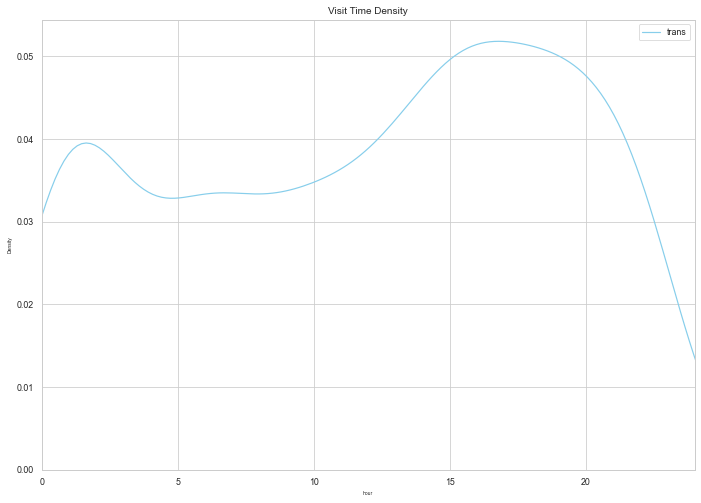

In [653]:
g = sns.distplot( df_t_trans['hour'] , bins = None, color="skyblue", label="trans", hist = False)
g.set(xlim=(0,24))
plt.legend()
plt.title("Visit Time Density")
g.figure.savefig("raw_visit_time_density.png")

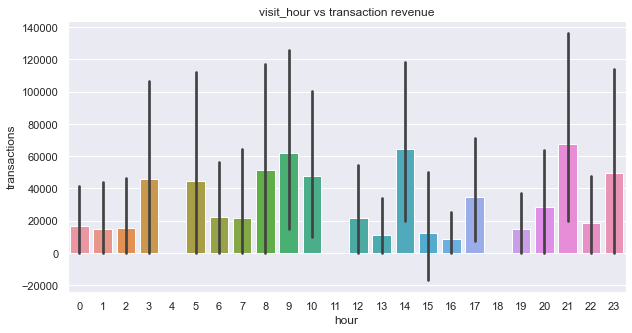

In [326]:
plt.figure(figsize=(10,5))
sns.barplot(inner_merged_total['hour'], inner_merged_total['transactions'], data = inner_merged_total)
plt.title('visit_hour vs transaction revenue')
plt.show()

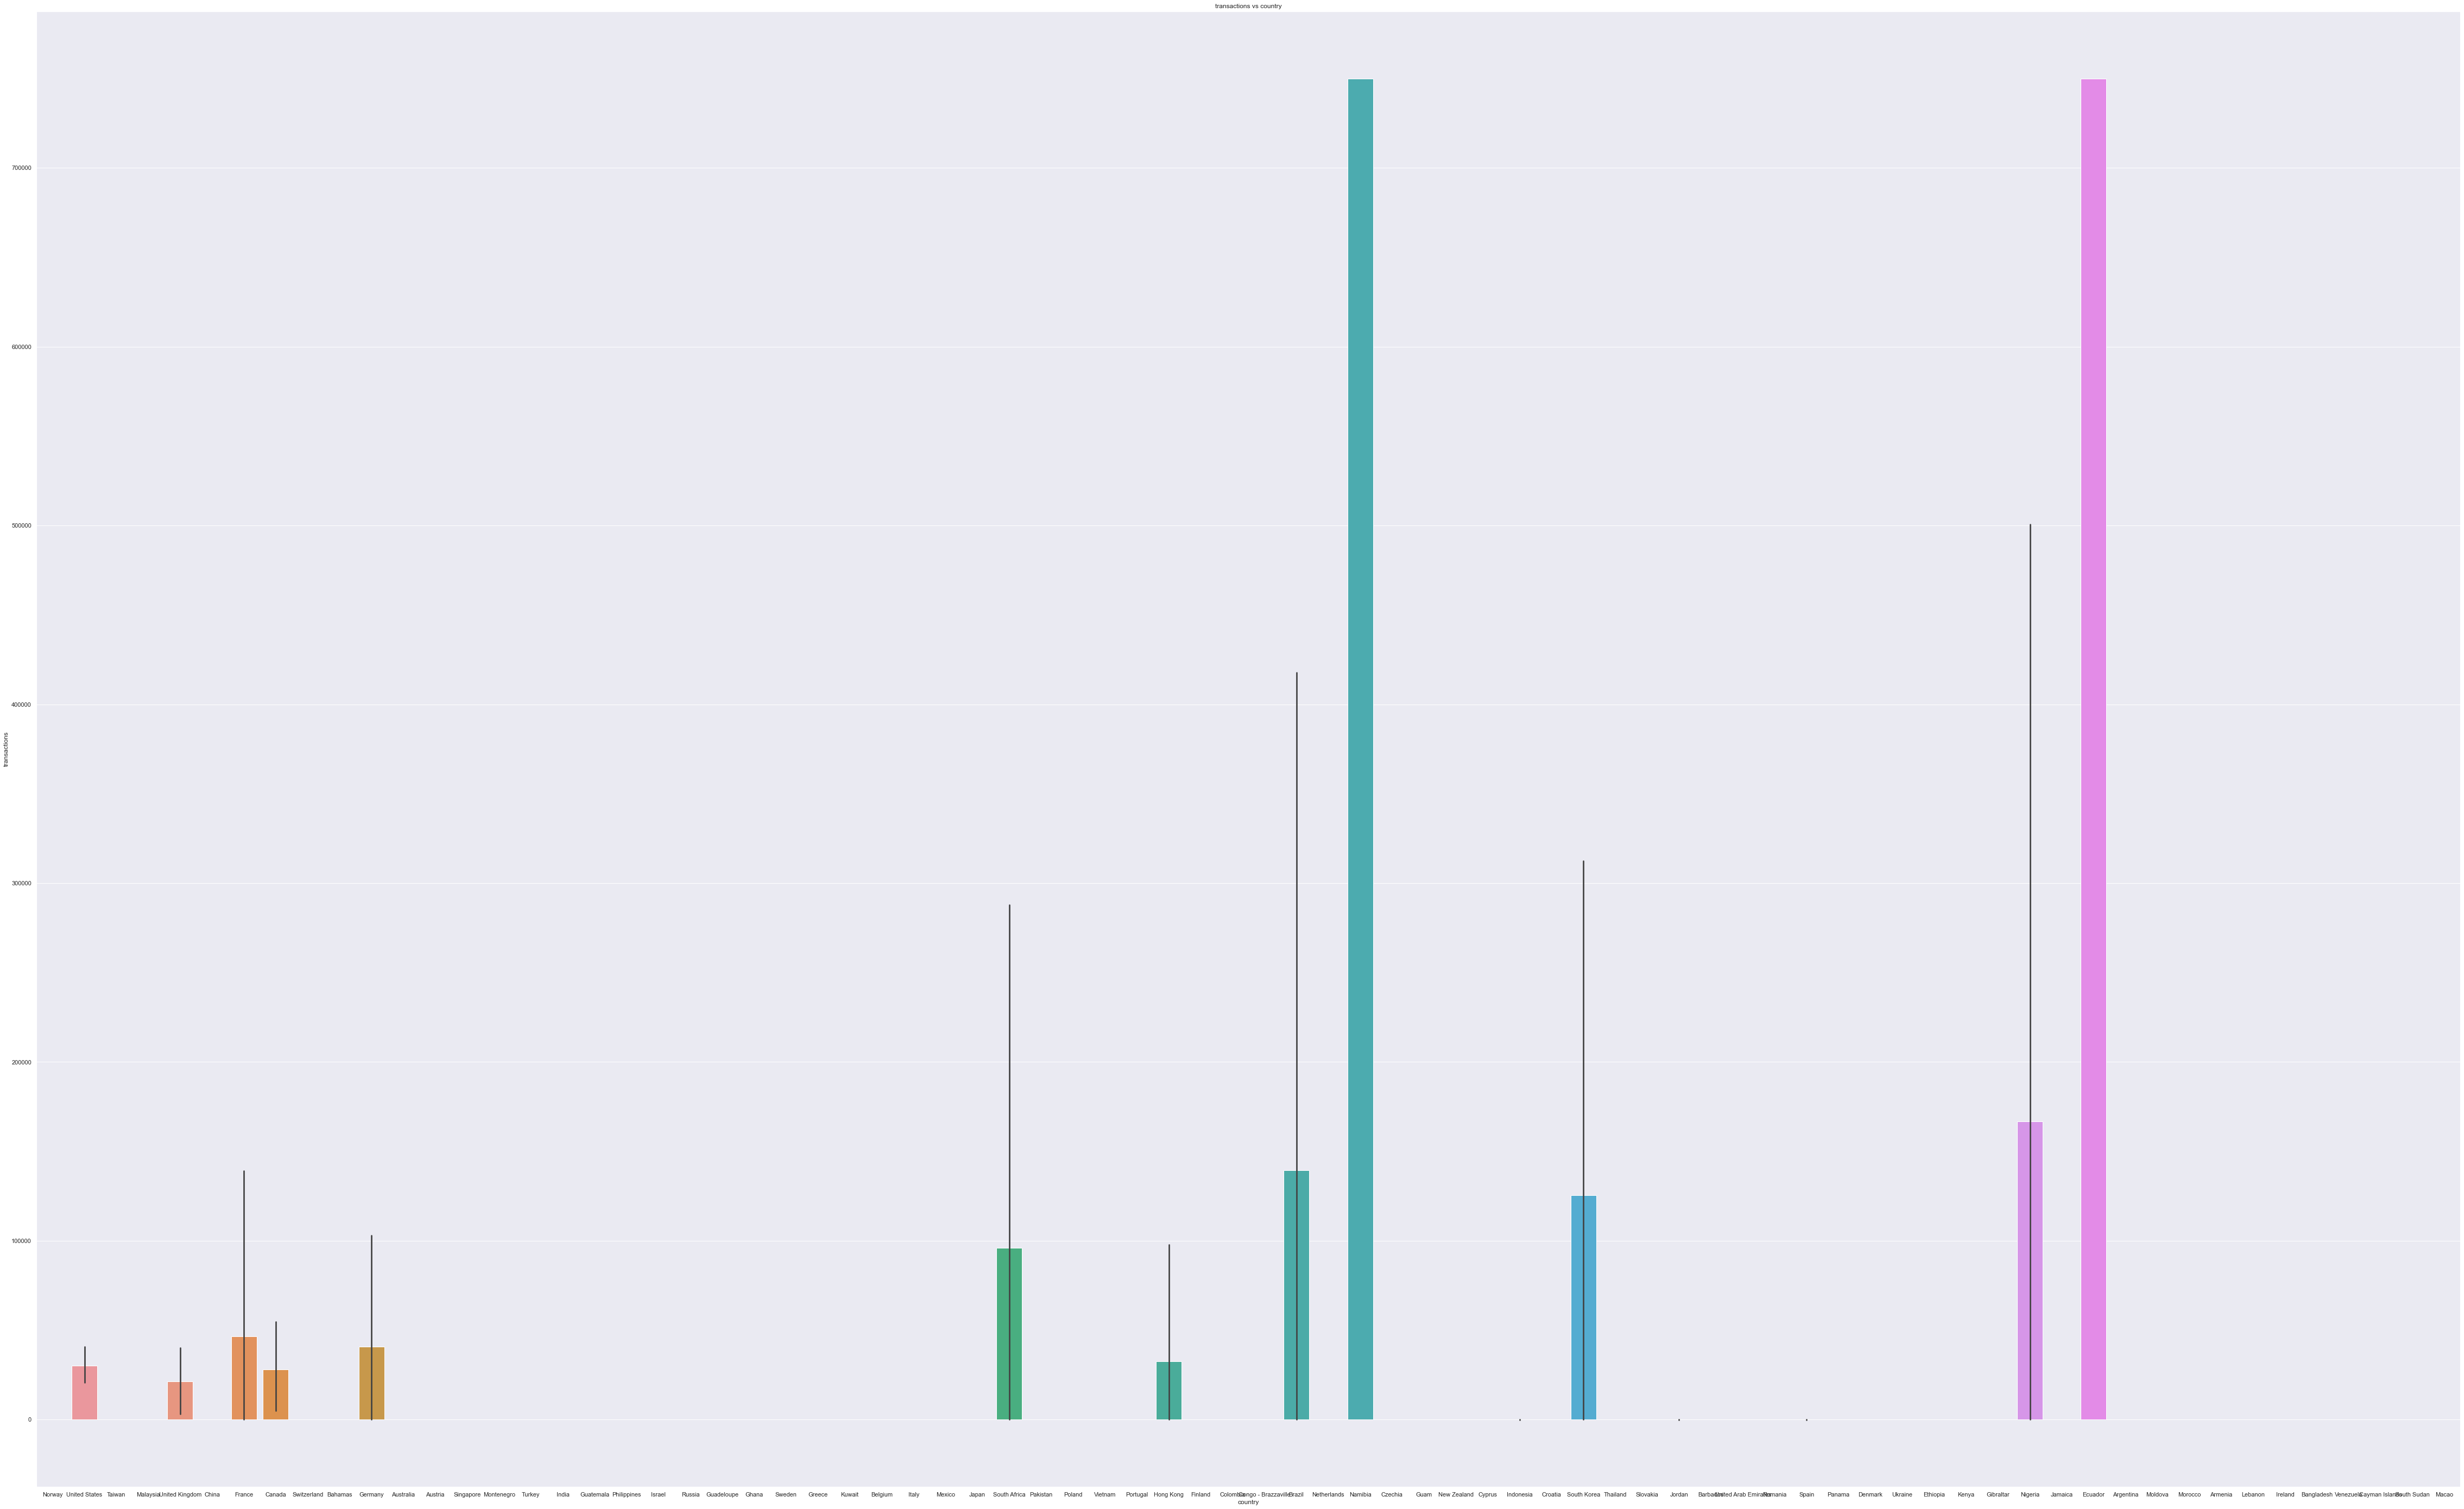

In [342]:
plt.figure(figsize=(80,50))
sns.barplot(inner_merged_total['country'], inner_merged_total['transactions'], data = inner_merged_total)
plt.title('transactions vs country')
plt.show()

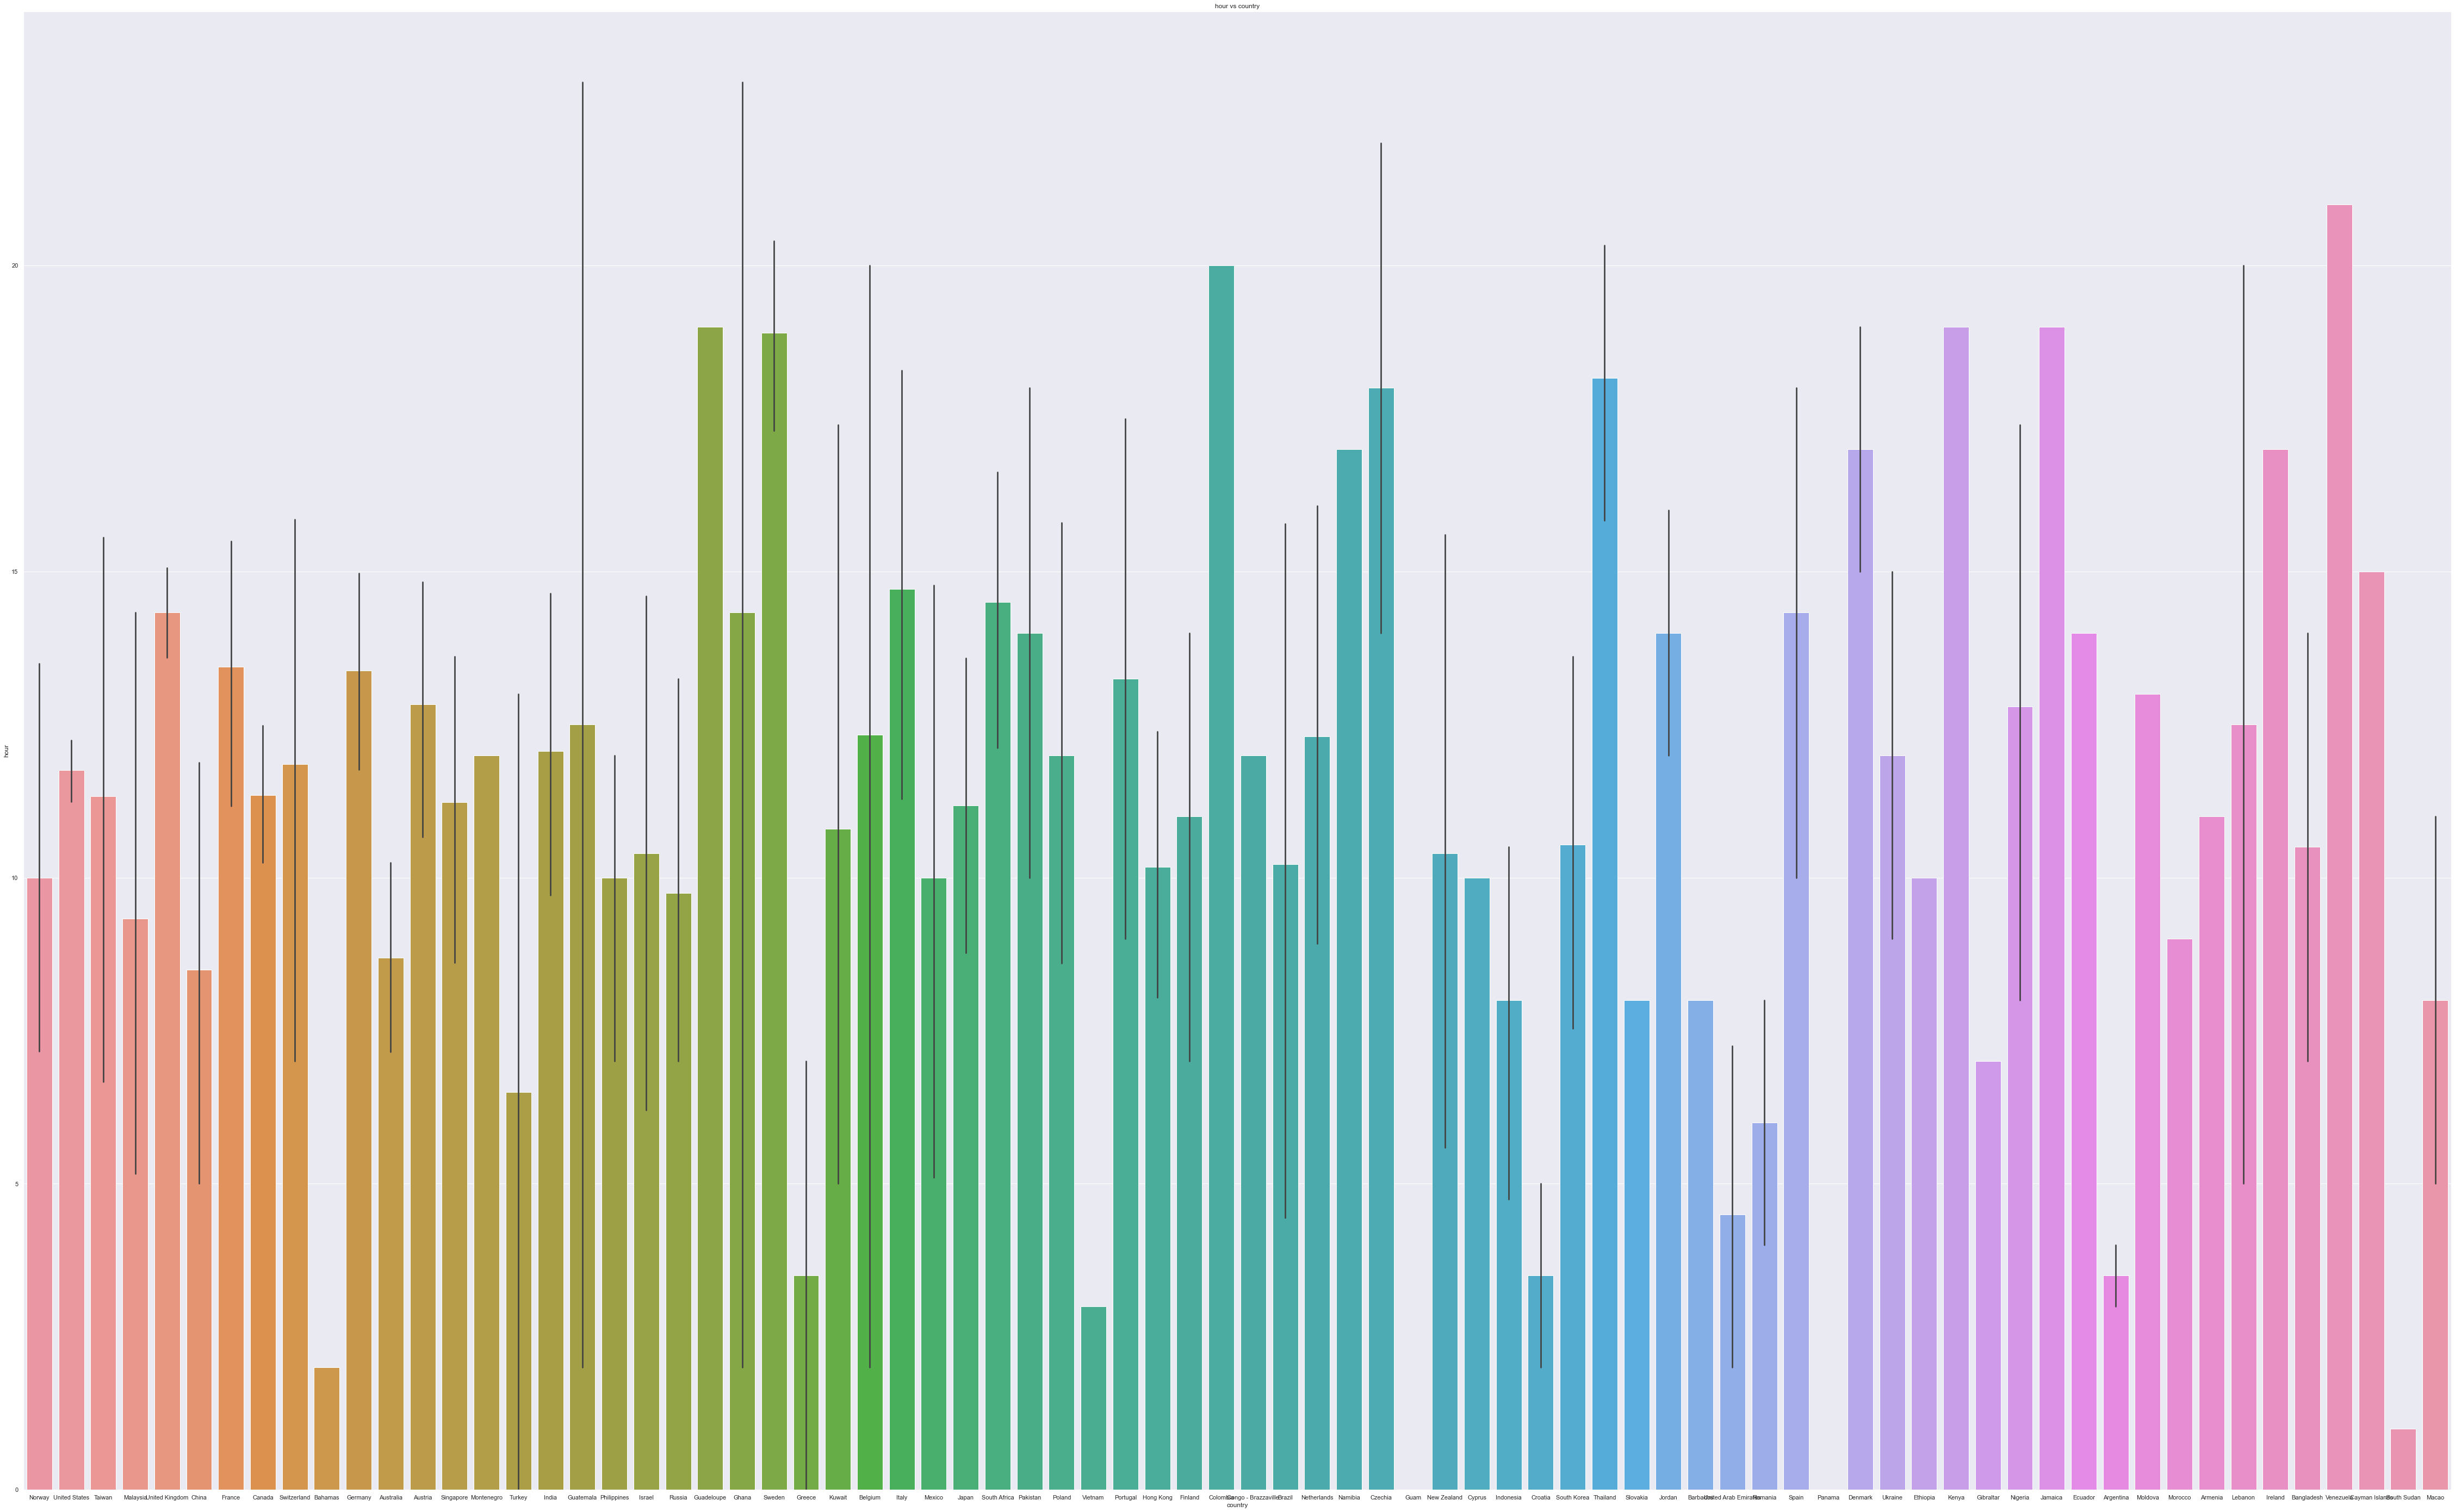

In [343]:
plt.figure(figsize=(80,50))
sns.barplot(inner_merged_total['country'], inner_merged_total['hour'], data = inner_merged_total)
plt.title('hour vs country')
plt.show()

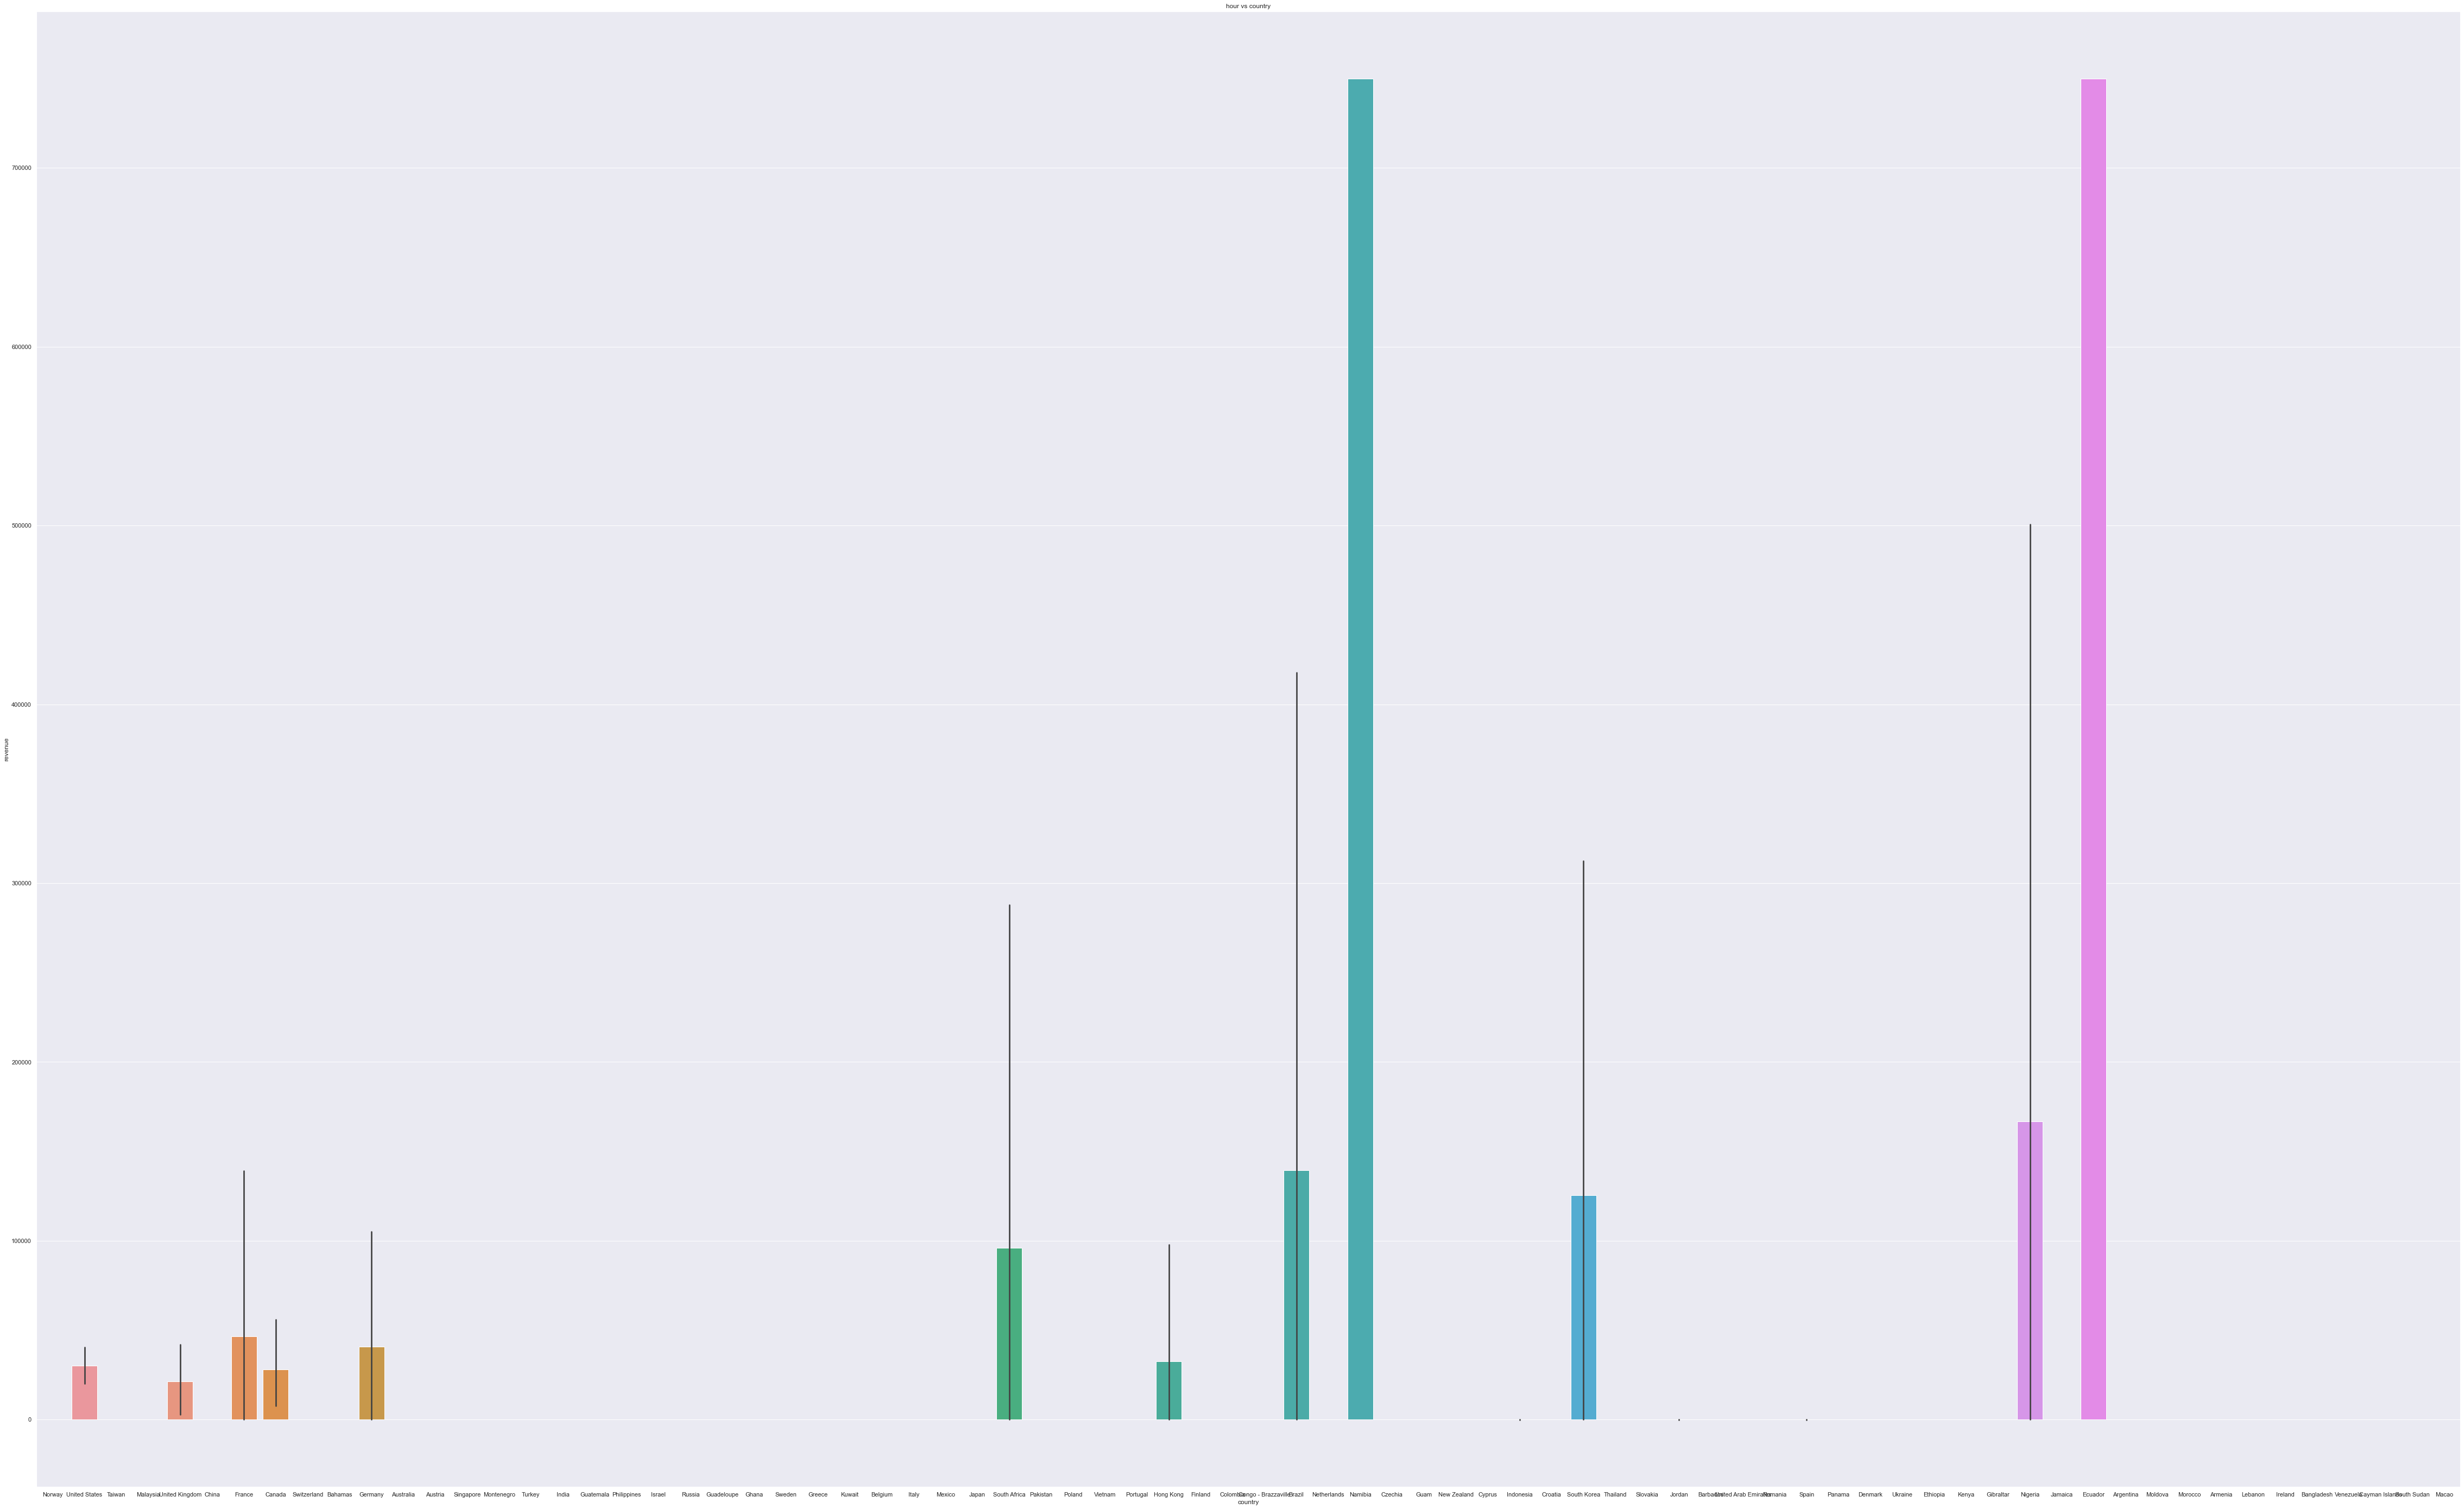

In [344]:
plt.figure(figsize=(80,50))
sns.barplot(inner_merged_total['country'], inner_merged_total['revenue'], data = inner_merged_total)
plt.title('revenue vs country')
plt.show()

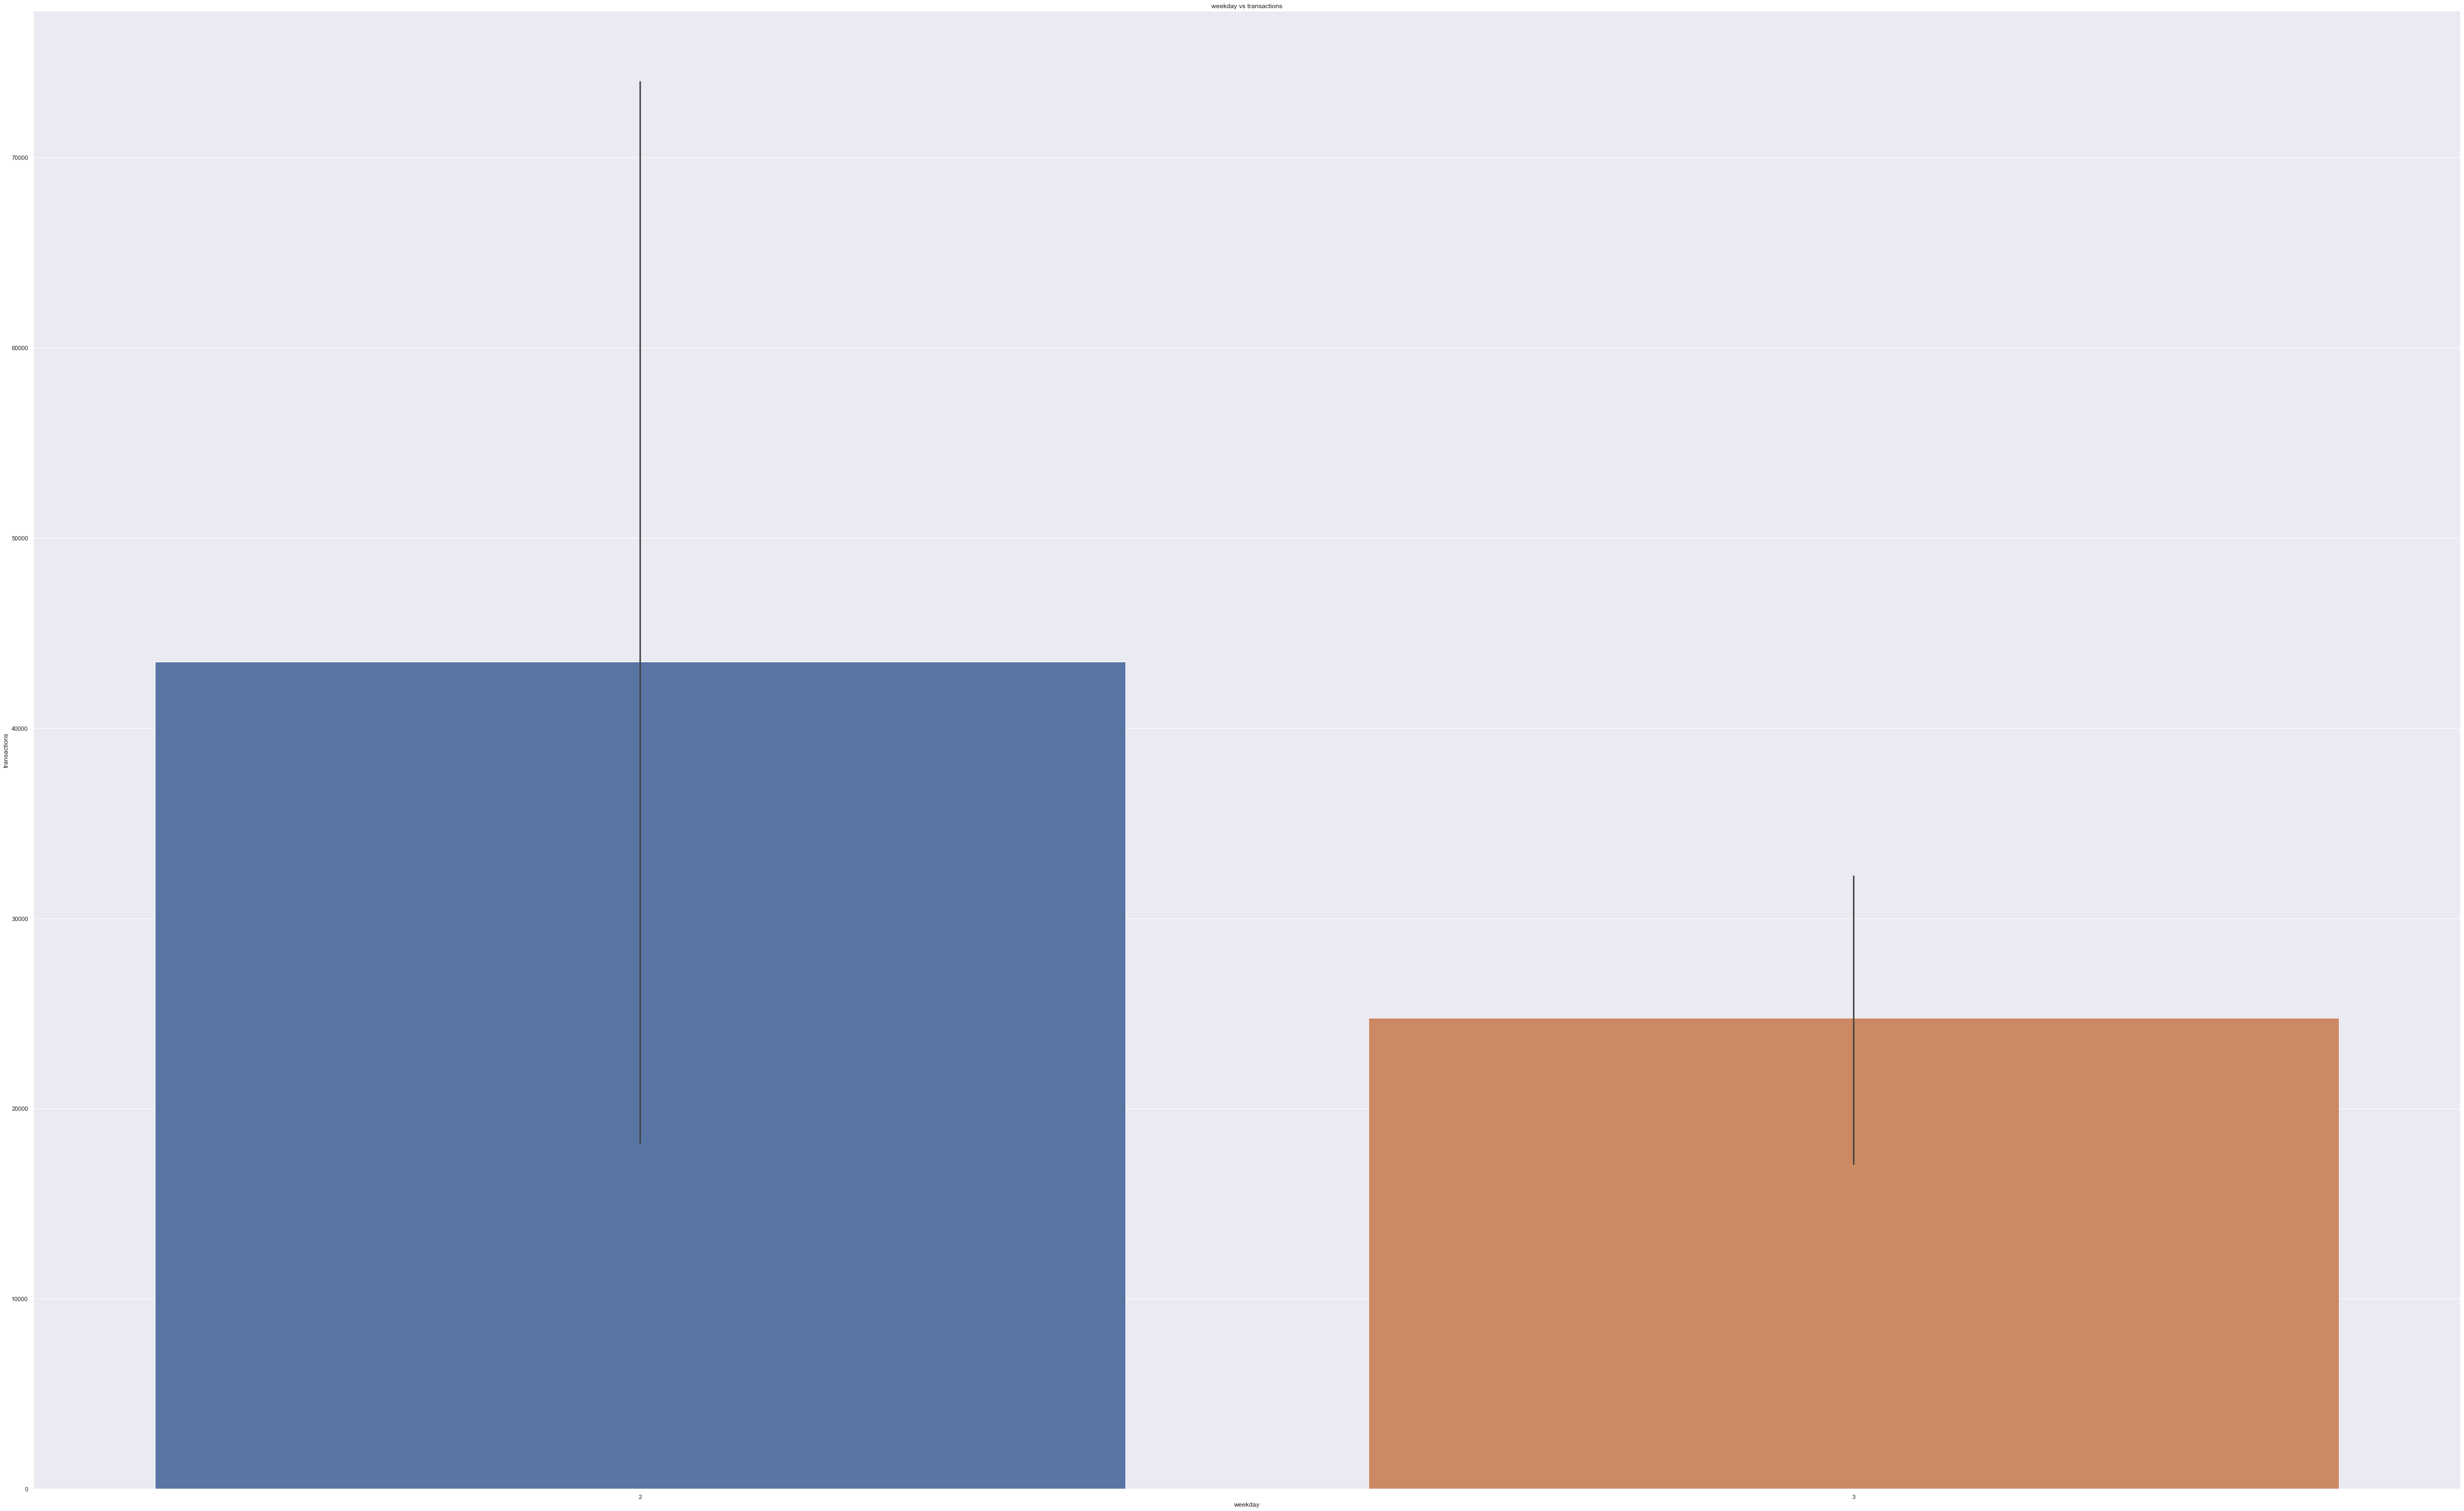

In [348]:
plt.figure(figsize=(80,50))
sns.barplot(inner_merged_total['weekday'], inner_merged_total['transactions'], data = inner_merged_total)
plt.title('weekday vs transactions')
plt.show()

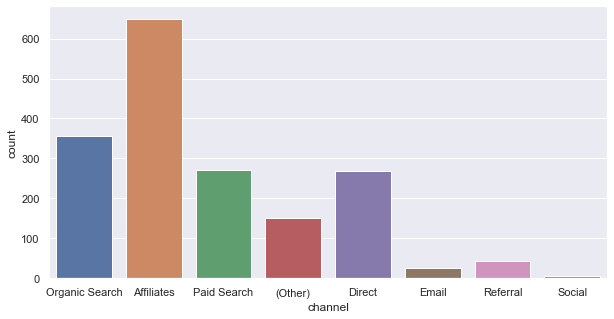

In [270]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="channel", data=inner_merged_total)

<BarContainer object of 8 artists>

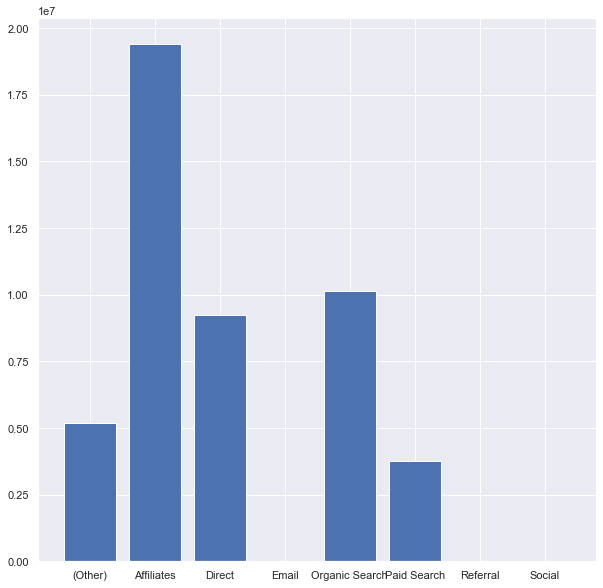

In [271]:
grpbychannel = inner_merged_total.groupby('channel')
revenue = dict(grpbychannel['transactions'].sum())
plt.figure(figsize= (10,10))
plt.bar(revenue.keys() , revenue.values())

<BarContainer object of 8 artists>

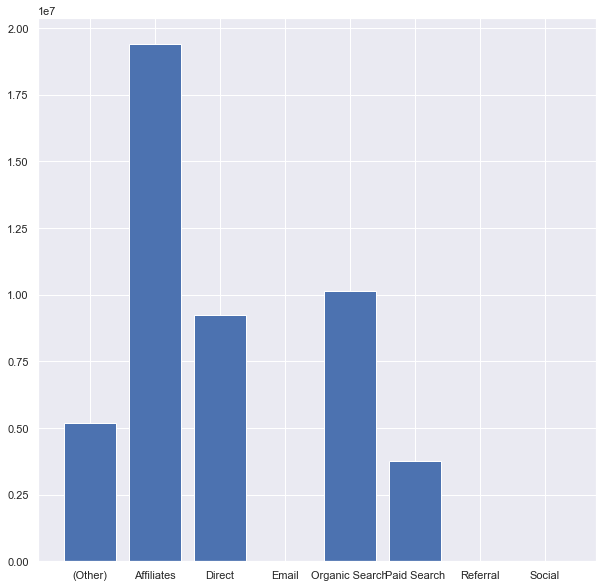

In [279]:
grpbychannel = inner_merged_total.groupby('channel')
revenue = dict(grpbychannel['revenue'].sum())
plt.figure(figsize= (10,10))
plt.bar(revenue.keys() , revenue.values())

Text(0, 0.5, 'No of Visits')

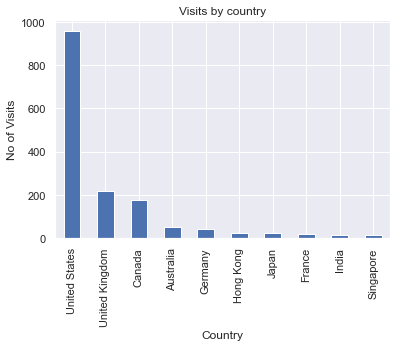

In [286]:
import matplotlib.pyplot as plt
gp =inner_merged_total.groupby('country')['session_id'].count().sort_values(ascending=False)[:10]

gp.plot(kind='bar',title='Visits by country')
plt.xlabel('Country')
plt.ylabel('No of Visits')
#gp.plot.bar(x='country', y='count')

In [360]:
temp = inner_merged_total.groupby('device')['transactions'].agg(['size', 'count']) 
temp

,size,count
device,,
desktop,1427,1427
mobile,309,309
tablet,32,32


In [402]:
 inner_merged_total[(inner_merged_total["device"]=='desktop') & (inner_merged_total["country"]=='United States') & (inner_merged_total["transactions"]>0)] 

,session_id,channel,device,visit_time,country,year,month,transactions,revenue,weekday,hour
3,14116763805965351669162512395120210701,(Other),desktop,2021-07-01 07:19:11,United States,2021,7,83.416461,83.416461,3,7
7,14385340808910276997162511133420210701,Organic Search,desktop,2021-07-01 03:48:54,United States,2021,7,125.343765,125.343765,3,3
8,5070421171258279481162515768020210701,Organic Search,desktop,2021-07-01 16:41:20,United States,2021,7,125.343765,125.343765,3,16
11,9140271447868763121162509105820210701,Paid Search,desktop,2021-06-30 22:10:58,United States,2021,6,125.002976,125.002976,2,22
12,10578501980089377543162514784120210701,Organic Search,desktop,2021-07-01 13:57:21,United States,2021,7,74.990555,74.990555,3,13
...,...,...,...,...,...,...,...,...,...,...,...
1911,2819519248309484951162509557520210701,Direct,desktop,2021-06-30 23:26:15,United States,2021,6,125.002976,125.002976,2,23
1913,4131086849832371525162517146320210701,(Other),desktop,2021-07-01 20:31:03,United States,2021,7,76.741211,76.741211,3,20
1919,16016595924885121956162510149720210701,Affiliates,desktop,2021-07-01 01:04:57,United States,2021,7,74.990555,74.990555,3,1
1924,12263504508306731580162515155120210701,Organic Search,desktop,2021-07-01 14:59:11,United States,2021,7,83.416461,83.416461,3,14


In [420]:
inner_merged_total.groupby('country').agg({'revenue': 'max'})['revenue'].nlargest(5)

country
United States     2003343.20
Canada            1337696.70
Brazil            1253437.65
United Kingdom     853638.19
France             834164.61
Name: revenue, dtype: float64

In [418]:
inner_merged_total.groupby('country').agg({'transactions': 'max'})['transactions'].nlargest(5)

country
United States     2003343.20
Canada            1337696.70
Brazil            1253437.65
United Kingdom     853638.19
France             834164.61
Name: transactions, dtype: float64

In [476]:
inner_merged_total[inner_merged_total.revenue != 0].groupby('country').revenue.apply(lambda g: g.nlargest(2).sum()).nlargest(3)

country
United States     3267155.22
Canada            2587726.46
United Kingdom    1687802.80
Name: revenue, dtype: float64

In [477]:
inner_merged_total[inner_merged_total.transactions != 0].groupby('country').transactions.apply(lambda g: g.nlargest(2).sum()).nlargest(3)

country
United States     3267155.22
Canada            2587726.46
United Kingdom    1687802.80
Name: transactions, dtype: float64

In [651]:
x= inner_merged_total.groupby(['country','device']).agg(lambda x:x.value_counts().index[0]).sort_values(by='Result'
                                                                                                        ,ascending=False)
x

session_id      channel  \
country        device                                                        
United States  desktop  4894008732288793726162517242620210701   Affiliates   
               tablet   8378499821863760311162509253620210701   Affiliates   
               mobile   4630505909613571908162510829120210701   Affiliates   
United Kingdom tablet   8573696894236988693162513435720210701   Affiliates   
Canada         mobile   5397200092125852237162515822220210701   Affiliates   
...                                                       ...          ...   
Indonesia      desktop   595990601583668428162514042720210701   Affiliates   
Jordan         desktop  3633796381356702167162514376720210701   Affiliates   
Indonesia      mobile   1683134080756414851162512803820210701  Paid Search   
United Kingdom desktop  7483902097392263141162515351020210701   Affiliates   
               mobile   3315715819289041017162515160920210701   Affiliates   

                                visit_time  year  month  transactions  \
country        device                                                   
United States  desktop 2021-07-01 10:11:12  2021      7     74.990555   
               tablet  2021-07-01 10:14:45  2021      7    125.343765   
               mobile  2021-07-01 16:35:57  2021      7     74.990555   
United Kingdom tablet  2021-07-01 16:21:07  2021      7     76.741211   
Canada         mobile  2021-07-01 08:02:48  2021      7     75.611232   
...                                    ...   ...    ...           ...   
Indonesia      desktop 2021-07-01 11:53:47  2021      7     74.990555   
Jordan         desktop 2021-07-01 16:13:34  2021      7    -83.416461   
Indonesia      mobile  2021-07-01 08:27:18  2021      7   -125.343765   
United Kingdom desktop 2021-07-01 15:46:14  2021      7     76.741211   
               mobile  2021-07-01 20:34:27  2021      7     76.741211   

                           revenue  weekday  hour         Total        Result  
country        device                                                          
United States  desktop   74.990555        3     0  19047.600970  2.812794e+07  
               tablet   125.343765        3     4  21057.752520  2.812631e+07  
               mobile    74.990555        3     0  19047.600970  2.527551e+07  
United Kingdom tablet    76.741211        3    10  10206.581063  4.648683e+06  
Canada         mobile    75.611232        3    16   6880.622112  2.101619e+06  
...                            ...      ...   ...           ...           ...  
Indonesia      desktop   74.990555        3     3    149.981110  0.000000e+00  
Jordan         desktop  -83.416461        3    16    -83.416461 -8.425906e+00  
Indonesia      mobile  -125.343765        3     8   -125.343765 -1.253438e+02  
United Kingdom desktop   76.741211        3    15  10206.581063 -8.168034e+04  
               mobile    76.741211        3    14  10206.581063 -8.244530e+04  

[116 rows x 11 columns]

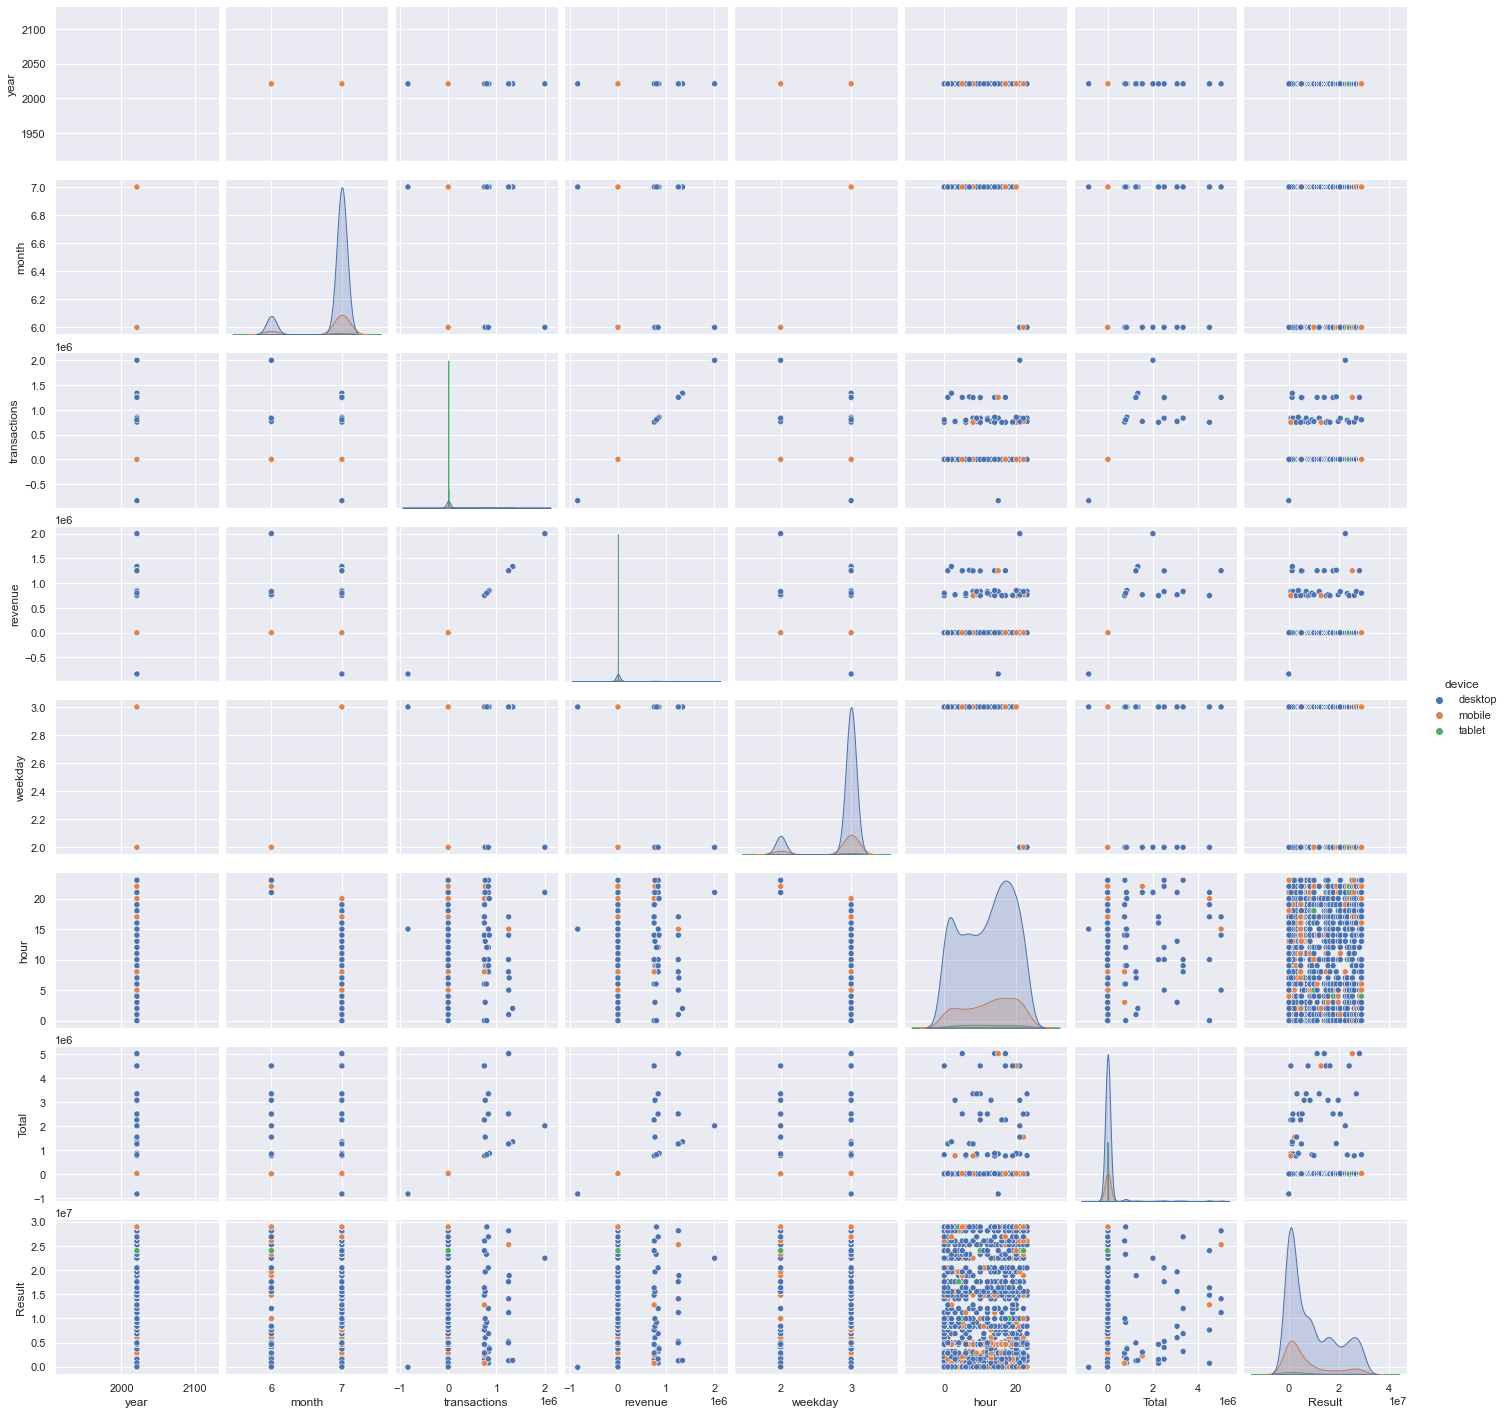

In [544]:
sns.pairplot(inner_merged_total, hue='device', size=2.5);

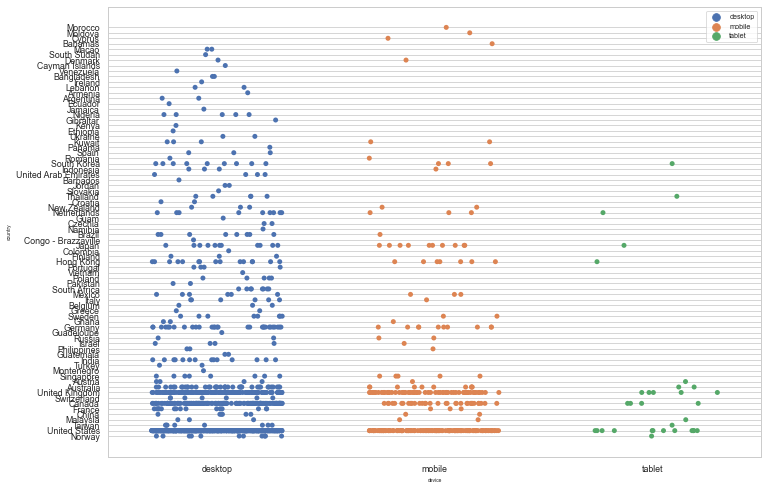

In [648]:
sns.set_style("whitegrid")

gfg = sns.stripplot(x="device", y="country",
                    hue="device", data=inner_merged_total, jitter=0.3, size=5)
plt.legend(fontsize='x-large', title_fontsize='20')
plt.show()